 ## Amazon reviews for a leading phone brand

A popular mobile phone brand has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

### Import Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import Sequential,layers

### Read the dataset

In [6]:
df=pd.read_csv('K8 Reviews v0.2.csv')

In [7]:
df.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


### Print some of the texts along with its emotions

In [8]:
for i in range(12):
    print(df['sentiment'][i],'---',df['review'][i])
    print()

1 --- Good but need updates and improvements

0 --- Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.

1 --- when I will get my 10% cash back.... its already 15 January..

1 --- Good

0 --- The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon

0 --- Only I'm telling don't buyI'm totally disappointedPoor batteryPoor cameraWaste of money

1 --- Phone is awesome. But while charging, it heats up allot..Really a genuine reason to hate Lenovo k8 note

0 --- The battery le

### View info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


### View basic statistical information about the dataset

In [10]:
df.describe()

,sentiment
count,14675.000000
mean,0.474480
std,0.499365
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Check for null values


In [11]:
df.isna().sum()

sentiment    0
review       0
dtype: int64

### Plot a countplot of 'Emotions'

<Axes: xlabel='count', ylabel='sentiment'>

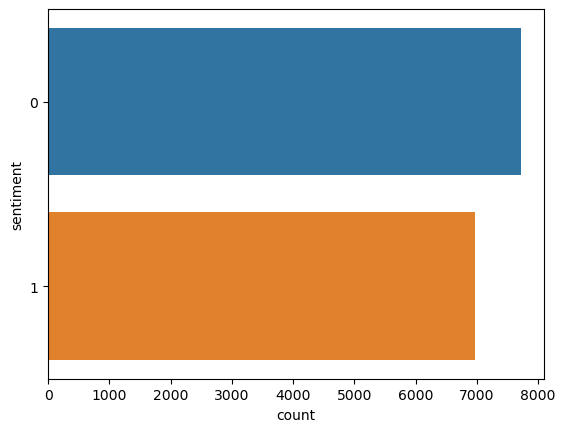

In [12]:
sns.countplot(y=df['sentiment'])

### Create a function to preprocess the text

In [13]:
def preprocessing(sentence):
    text=re.sub(r"[^a-zA_Z0-9]"," ",sentence).split()
    words=[x.lower() for x in text if x not in stopwords.words('english')]
    
    lemma=WordNetLemmatizer()
    word=[lemma.lemmatize(word,'v')for word in words]
    
    word=' '.join(word)
    return word

### Apply the function on Text column 

In [14]:
df['review']=df['review'].apply(preprocessing)

### Print some of the texts after the preprocess

In [15]:
for i in range(12):
    print(df['sentiment'][i],'---',df['review'][i])
    print()

1 --- ood need update improvements

0 --- orst mobile buy ever attery drain like hell backup 6 7 hours internet use even put mobile idle get discharge biggest lie amazon enove expect make full say battery 4000 a booster charger fake take least 4 5 hours fully charge know enovo survive make full us lease go else regret like

1 --- get 10 cash back already 15 anuary

1 --- ood

0 --- worst phone ever hey change last phone problem still amazon return phone ighly disappoint amazon

0 --- nly tell buy totally disappoint oor battery oor camera aste money

1 --- hone awesome ut charge heat allot eally genuine reason hate enovo k8 note

0 --- battery level wear

0 --- hit problems phone hang problems enovo k 8 note service station ahmedabad one years warranty change phone lenovo

0 --- a lot glitches dont buy thing better go options

0 --- rost

1 --- ood phone charger work damage within 2 months



### Split the dataset into Input and Target Variables

In [16]:
x=df['review']
y=df['sentiment']

### Split the dataset into Training and Testing Set

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02)

### Convert text to Sequence and add padding

In [18]:
tokenizer=Tokenizer(num_words=5000)

#### "fit_on_texts" - This method creates the vocabulary index based on word frequency. Each word gets a unique id

In [19]:
tokenizer.fit_on_texts(x_train)

vocab_size=len(tokenizer.word_index)+1
vocab_size

10485

In [20]:
def text_encoded(txt):
    encoded_class=tokenizer.texts_to_sequences(txt)
    
    padded_sequence=pad_sequences(encoded_class,maxlen=128)
    return padded_sequence

### Apply the function on both Training and Testing set

In [21]:
x_train=text_encoded(x_train)
x_test=text_encoded(x_test)

### Create a keras Sequential model with LSTM Layers

### Embedding layer:
 * Vocab size: Number of unique words in our training set
 * Second argument (In this case "128" is the size of each embedding vectors

In [27]:
model=Sequential()

model.add(layers.Embedding(vocab_size,128)),

model.add(layers.LSTM(128,return_sequences=True)),
model.add(layers.Dropout(0.02))

model.add(layers.LSTM(128)),
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.02))

model.add(layers.Dense(1,activation='sigmoid'))

### Compile the model

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train the model

In [29]:
model.fit(x_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10


C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


427/427 [==============================] - 121s 274ms/step - loss: 0.0000e+00 - accuracy: 0.5234 - val_loss: 0.0000e+00 - val_accuracy: 0.5347
Epoch 2/10
427/427 [==============================] - 119s 278ms/step - loss: 0.0000e+00 - accuracy: 0.5235 - val_loss: 0.0000e+00 - val_accuracy: 0.5347
Epoch 3/10
427/427 [==============================] - 127s 298ms/step - loss: 0.0000e+00 - accuracy: 0.5235 - val_loss: 0.0000e+00 - val_accuracy: 0.5347
Epoch 4/10
427/427 [==============================] - 127s 297ms/step - loss: 0.0000e+00 - accuracy: 0.5235 - val_loss: 0.0000e+00 - val_accuracy: 0.5347
Epoch 5/10
427/427 [==============================] - 124s 291ms/step - loss: 0.0000e+00 - accuracy: 0.5235 - val_loss: 0.0000e+00 - val_accuracy: 0.5347
Epoch 6/10
427/427 [==============================] - 124s 292ms/step - loss: 0.0000e+00 - accuracy: 0.5235 - val_loss: 0.0000e+00 - val_accuracy: 0.5347
Epoch 7/10
427/427 [==============================] - 129s 302ms/step - loss: 0.0000e+0

### Make Prediction with X_test

In [31]:
pred=model.predict(x_test)

10/10 [==============================] - 1s 81ms/step


In [32]:
pred=[np.argmax(i) for i in pred]

### Model Evaluation

In [34]:
model.evaluate(x_train,y_train)

450/450 [==============================] - 38s 85ms/step - loss: 0.0000e+00 - accuracy: 0.5241


[0.0, 0.52409428358078]

#### Accuracy score

In [35]:
accuracy_score(y_test,pred)

0.5952380952380952

### Confusion Matrix

<Axes: >

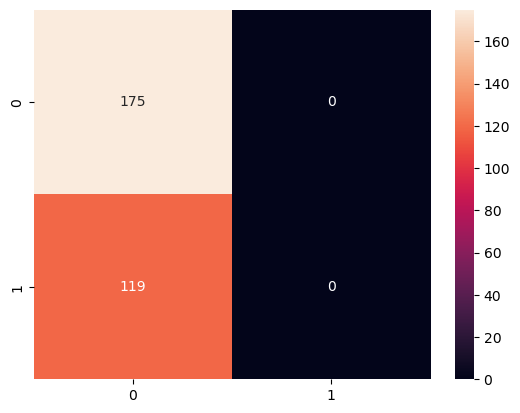

In [37]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

### Classification report

In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       175
           1       0.00      0.00      0.00       119

    accuracy                           0.60       294
   macro avg       0.30      0.50      0.37       294
weighted avg       0.35      0.60      0.44       294



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
